In [38]:
import pandas as pd

In [39]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
df = pd.read_csv(url)
df.head(7)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True


In [40]:
df.tail()

,Nome,Idade,Notas,Aprovado
13,Mirla,25,9.0,True
14,Paulo,37,NaN,False
15,Mylena,29,7.0,True
16,Lucas,33,NaN,False
17,Nadia,34,8.0,True


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nome      18 non-null     object 
 1   Idade     18 non-null     int64  
 2   Notas     12 non-null     float64
 3   Aprovado  18 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 578.0+ bytes


In [42]:
df.shape

(18, 4)

In [43]:
df.columns

Index(['Nome', 'Idade', 'Notas', 'Aprovado'], dtype='object')

In [44]:
df['Nome']


0           Ary
1           Ana
2         Cátia
3         Denis
4          Beto
5         Bruna
6          Dara
7        Carlos
8         Alice
9         Vitor
10       Daniel
11         Igor
12    Sthefanie
13        Mirla
14        Paulo
15       Mylena
16        Lucas
17        Nadia
Name: Nome, dtype: object

In [45]:
df[['Idade', 'Notas']]


,Idade,Notas
0,20,7.5
1,18,NaN
2,27,2.5
3,18,5.0
4,21,10.0
5,23,NaN
6,21,7.0
7,19,6.0
8,35,5.6
9,28,NaN


In [46]:
df.dtypes

Nome         object
Idade         int64
Notas       float64
Aprovado       bool
dtype: object

In [47]:
df.describe()


,Idade,Notas
count,18.000000,12.000000
mean,25.500000,6.800000
std,6.070662,2.204953
min,18.000000,2.500000
25%,21.000000,5.450000
50%,24.500000,7.000000
75%,28.750000,8.250000
max,37.000000,10.000000


### Exercicios 02


In [48]:
df = pd.read_csv('./aluguel.csv', sep=';')
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


#### 1) Calcular a média de quartos por apartamento;



In [49]:
df.query('Tipo == "Apartamento"')
df_apartamento = df.query('Tipo == "Apartamento"')
df_apartamento.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


In [50]:
df_apartamento['Quartos'].mean()

2.481568707761622

#### 2) Conferir quantos bairros únicos existem na nossa base de dados;



In [51]:
df['Bairro'].unique()

array(['Copacabana', 'Jardim Botânico', 'Barra da Tijuca', 'Centro',
       'Higienópolis', 'Vista Alegre', 'Cachambi', 'Ramos', 'Grajaú',
       'Lins de Vasconcelos', 'Botafogo', 'Taquara',
       'Freguesia (Jacarepaguá)', 'Tijuca', 'Olaria', 'Leblon',
       'São Cristóvão', 'Ipanema', 'Campo Grande',
       'Recreio dos Bandeirantes', 'Jardim Oceânico', 'Humaitá',
       'Península', 'Méier', 'Vargem Pequena', 'Maracanã', 'Jacarepaguá',
       'Vargem Grande', 'São Conrado', 'Maria da Graça', 'Vila Valqueire',
       'Gávea', 'Cosme Velho', 'Bonsucesso', 'Todos os Santos',
       'Laranjeiras', 'Itanhangá', 'Flamengo', 'Praça Seca', 'Piedade',
       'Lagoa', 'Santo Cristo', 'Largo do Machado', 'Catete',
       'Jardim Carioca', 'Benfica', 'Glória', 'Vila Isabel',
       'Quintino Bocaiúva', 'São Francisco Xavier', 'Rocha Miranda',
       'Engenho Novo', 'Engenho de Dentro', 'Cidade Nova', 'Pilares',
       'Arpoador', 'Tomás Coelho', 'Água Santa', 'Ilha do Governador',
       'Ja

#### 3) Analisar quais bairros possuem a média de valor de aluguel mais elevadas


In [52]:
df_media =df.groupby('Bairro')[['Valor']].mean().sort_values('Valor', ascending=False)
# O parâmetro ascending=False é usado na função sort_values() para ordenar os valores em ordem decrescente (do maior para o menor).
df_media.head(10)

df_media_elevada = df_media.head()

#### 4) Criar um gráfico de barras horizontais que apresente os 5 bairros com as médias de valores de aluguel mais elevadas.

<Axes: ylabel='Bairro'>

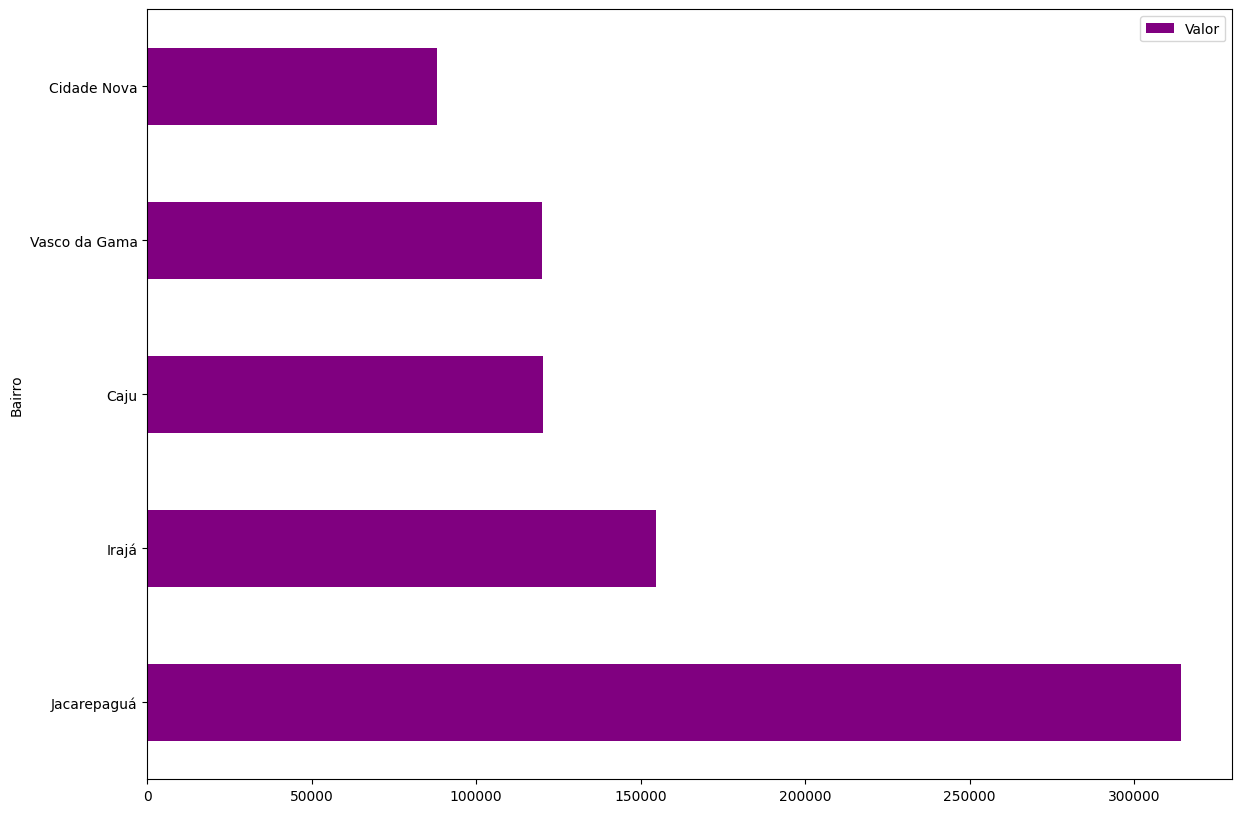

In [53]:
df_media_elevada.plot(kind = 'barh', figsize = (14,10),color = 'purple')

In [54]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


##### Exercios 3

In [55]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
df = pd.read_csv(url)

In [56]:
df

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,NaN,False


In [57]:
df.isnull().sum()

Nome        0
Idade       0
Notas       6
Aprovado    0
dtype: int64

In [58]:
df = df.fillna(0)

In [59]:
registros_remover = df.query('Nome == "Alice" | Nome == "Carlos"').index

In [60]:
df.drop(registros_remover, axis = 0, inplace = True)

In [61]:
selecao = df['Aprovado'] == True

In [62]:
df[selecao]
df_final = df[selecao]

In [63]:
df[selecao]

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,7.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


In [64]:
df_final.to_csv('alunos_aprovados.csv', index = False, sep = ';')

In [65]:
df_final.replace(7,8,inplace= True)

/tmp/ipykernel_7484/3909793010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.replace(7,8,inplace= True)


In [66]:
df_final

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,8.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,8.0,True
17,Nadia,34,8.0,True


#### Manipulando dados

1) Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles. Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles.



In [67]:
df['Pontos_extras'] = df['Notas'].apply(lambda x: x*0.4)
df.head()

,Nome,Idade,Notas,Aprovado,Pontos_extras
0,Ary,20,7.5,True,3.0
1,Ana,18,0.0,False,0.0
2,Cátia,27,2.5,False,1.0
3,Denis,18,5.0,False,2.0
4,Beto,21,10.0,True,4.0


2) Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras.



In [68]:
df['Notas_finais'] = df['Notas'] + df['Pontos_extras']
df.head()

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais
0,Ary,20,7.5,True,3.0,10.5
1,Ana,18,0.0,False,0.0,0.0
2,Cátia,27,2.5,False,1.0,3.5
3,Denis,18,5.0,False,2.0,7.0
4,Beto,21,10.0,True,4.0,14.0


3) Como houve uma pontuação extra, alguns alunos que não tinham sido aprovados antes podem ter sido aprovados agora. Com base nisso, crie uma coluna chamada "Aprovado_final" com os seguintes valores:



In [74]:
df['Aprovado_final'] = df['Notas_finais'].apply(lambda x: 'True' if x >= 6 else False)
df

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
0,Ary,20,7.5,True,3.0,10.5,True
1,Ana,18,0.0,False,0.0,0.0,False
2,Cátia,27,2.5,False,1.0,3.5,False
3,Denis,18,5.0,False,2.0,7.0,True
4,Beto,21,10.0,True,4.0,14.0,True
5,Bruna,23,0.0,False,0.0,0.0,False
6,Dara,21,7.0,True,2.8,9.8,True
9,Vitor,28,0.0,False,0.0,0.0,False
10,Daniel,21,0.0,False,0.0,0.0,False
11,Igor,24,4.5,False,1.8,6.3,True


4) Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras.

In [75]:
df.query('Aprovado == False & Aprovado_final == True')

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final


In [71]:
selecao = (df['Aprovado'] == False) & (df['Aprovado_final'] == True)
df[selecao]

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final


In [79]:
df.query('Aprovado == False and Aprovado_final == True')

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
